In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller

from Forecast_functions import *

In [41]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [42]:
File_path = 'Sales Data.txt'
ProductCodes = [7000158, 7000043, 7000157, 7000022, 7003399]
plants = ['Bangalore New CFA', 'Delhi CFA', 'Zirakpur CFA']
Sales_Channels = ['CP-GT', 'RETAIL', 'CP-NMT']
models = ['arima', 'sarimax', 'rnn']

In [53]:
df = select_df(File_path= 'Sales Data.txt', ProductCode=ProductCodes[0], 
              PlantCode=plants[0], Sales_Channel=Sales_Channels[0],freq='D')

C:\Disk D\Forecasting Models\Python Notebooks\Forecast_functions.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample(freq).mean()
C:\Users\FQ467WA\AppData\Local\anaconda3\Lib\site-packages\scipy\interpolate\_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


<Axes: xlabel='Date'>

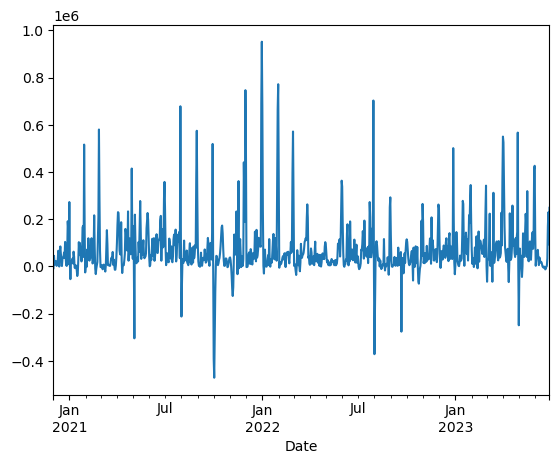

In [55]:
df.Sales_Value.plot()

In [69]:
tr, ts = train_test_split(df['Sales_Value'], 0.7)

<Axes: xlabel='Date'>

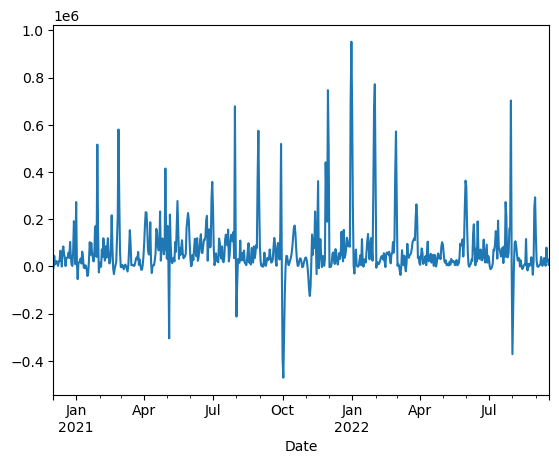

In [70]:
tr.plot()

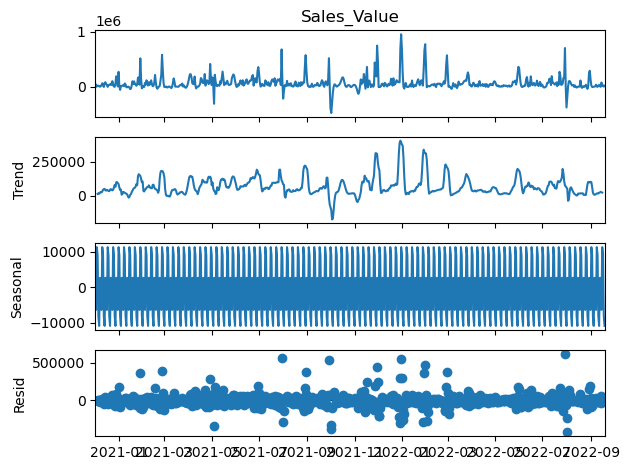

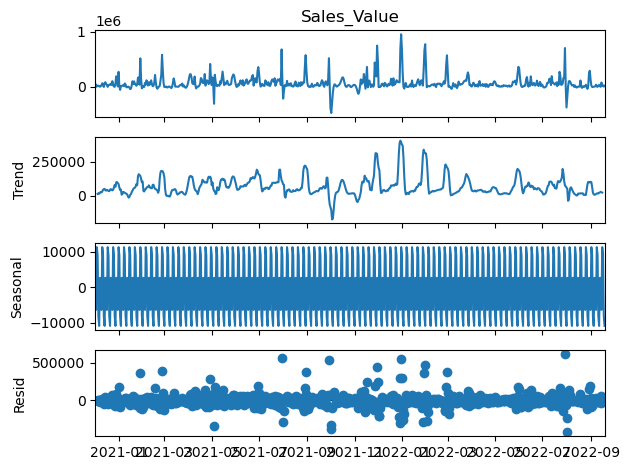

In [71]:
seasonal_decompose(tr).plot()

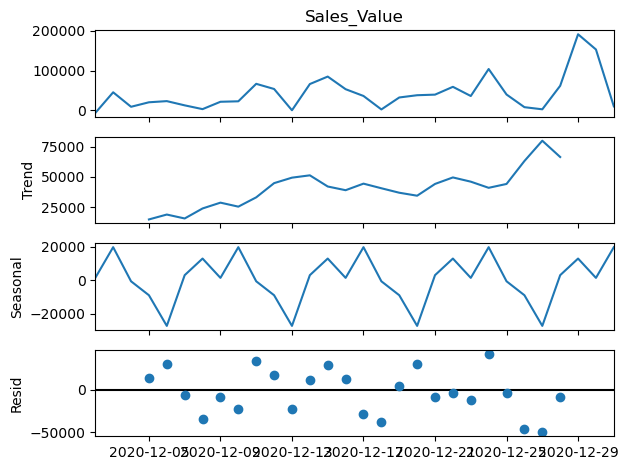

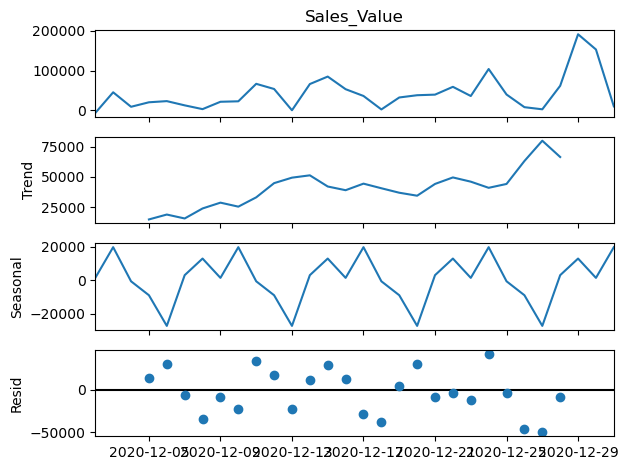

In [72]:
seasonal_decompose(tr.iloc[:30]).plot()

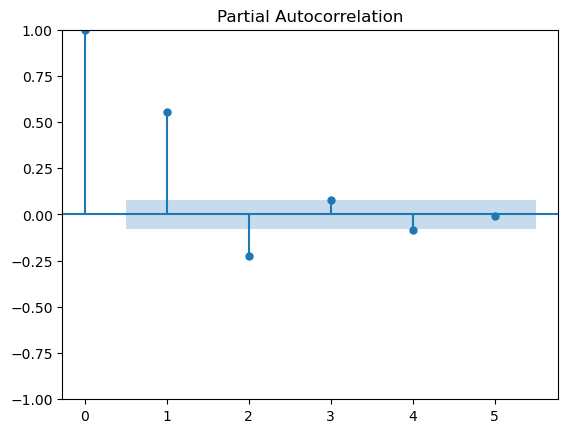

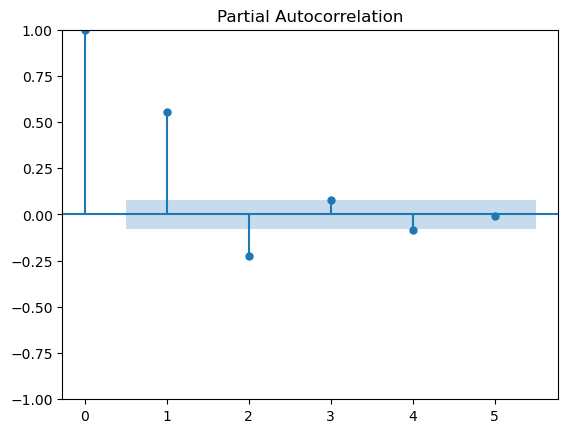

In [78]:
plot_pacf(tr, lags=5)

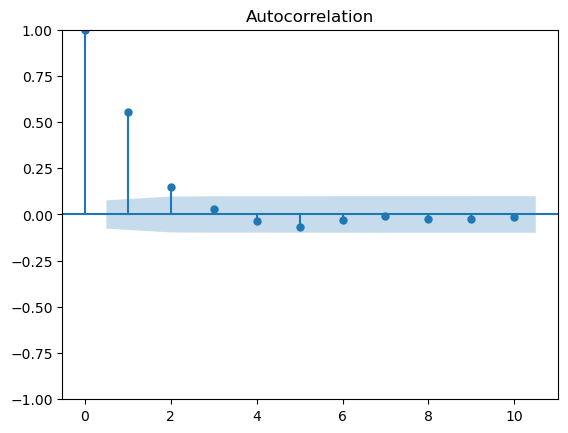

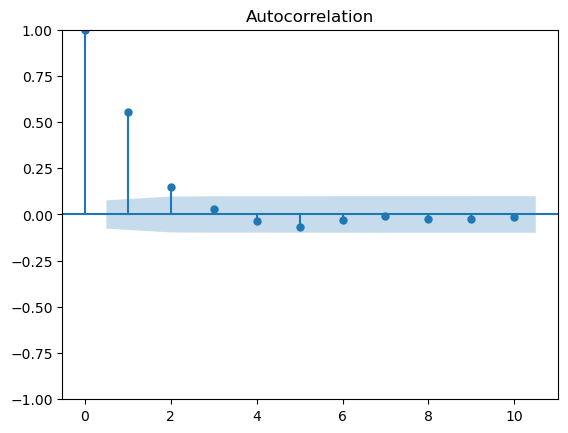

In [76]:
plot_acf(tr, lags = 10)

In [87]:
model = SARIMAX(tr, order = (1,0,2), seasonal_order=(1,1,1,7)).fit()

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         Sales_Value   No. Observations:                  657
Model:             SARIMAX(1, 0, 2)x(1, 1, [1], 7)   Log Likelihood               -8465.906
Date:                             Wed, 23 Aug 2023   AIC                          16943.812
Time:                                     14:12:31   BIC                          16970.674
Sample:                                 12-02-2020   HQIC                         16954.231
                                      - 09-19-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2705      0.335      0.807      0.419      -0.386       0.927
ma.L1          0.4382      0.336      1.305      0.192      -0.220       1.096
ma.L2          0.0109      0.220      0.050      0.960      -0.420       0.442
ar.S.L7        0.0030      0.086      0.035      0.972      -0.166       0.172
ma.S.L7       -0.9591      0.036    -26.714      0.000      -1.029      -0.889
sigma2      1.918e+10   9.69e-11   1.98e+20      0.000    1.92e+10    1.92e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5232.55
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             2.11
Prob(H) (two-sided):                  0.24   Kurtosis:                        16.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.76e+36. Standard errors may be unstable.
"""

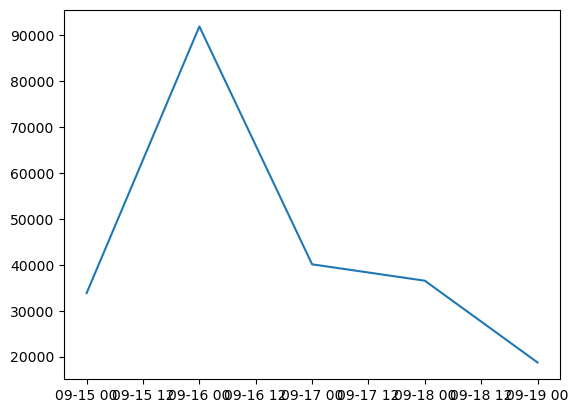

In [89]:
plt.plot(model.predict(start='2022-09-15', end = '2022-09-19'))

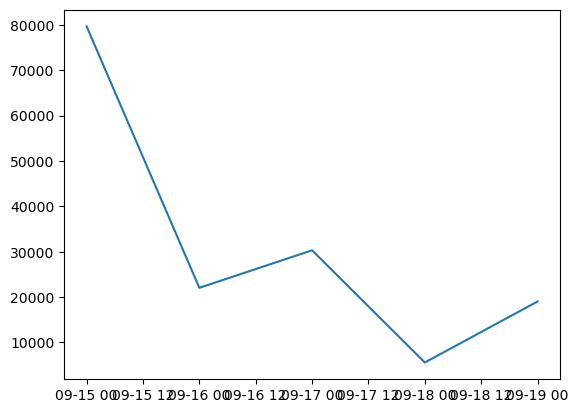

In [90]:
plt.plot(tr.loc['2022-09-15':])